In [1]:
from scipy.stats import uniform
from scipy.stats import norm
import statistics as stat
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Portfolio Investment Returns

Historical returns from 1928 until present were collected.  Three additional columns were created based on a 80% portfolio investment (Aggressive), a 65% stock investment (Moderate), and a 50% stock investment (Conservative).

In [2]:
returns = pd.read_excel('Data/StockReturns.xlsx')
returns.head()
print(returns.mean())

Year            1975.000000
S&P 500            0.115065
Aggressive         0.092052
Moderate           0.074793
Conservative       0.057533
dtype: float64


### Creating future return distributions

From the historical stock return data, samples means were generated to create a normalized distribution.  This list of probable returns will be used to forecast future portfolio performance.

In [3]:
#S&P 500 return rates, fewer samples were taken to increase the volatility
norm_returns = []

for i in range(500):
    sample = returns['S&P 500'].sample(5)
    sample_mean = np.mean(sample)
    norm_returns.append(sample_mean)

#creating a new dataframe (csv) file for the future return rates
future_returns = pd.DataFrame(norm_returns, columns=['S&P Future'])

In [4]:
#Aggresive return rates
aggresive_returns = []

for i in range(500):
    sample = returns['Aggressive'].sample(10)
    sample_mean = np.mean(sample)
    aggresive_returns.append(sample_mean)

#adding the aggresive future returns to the futures dataframe
future_returns['Aggressive Future'] = aggresive_returns

In [5]:
#Moderate return rates
moderate_returns = []

for i in range(500):
    sample = returns['Moderate'].sample(20)
    sample_mean = np.mean(sample)
    moderate_returns.append(sample_mean)

#adding the aggresive future returns to the futures dataframe
future_returns['Moderate Future'] = moderate_returns

In [6]:
#Conservative return rates, greater samples were taken to decrease the volatility
conservative_returns = []

for i in range(500):
    sample = returns['Conservative'].sample(30)
    sample_mean = np.mean(sample)
    conservative_returns.append(sample_mean)

#adding the aggresive future returns to the futures dataframe
future_returns['Conservative Future'] = conservative_returns

In [7]:
future_returns.to_csv('Data/futurereturns.csv')

## Plotting the return rate distributions

After researching historical portfolio performance, I worked with both the mean sample sizes and the return rate columns from the historical table to create return distributions that best matched expected portfolio performance.

While the S&P 500 returns have the greatest spread, this set of returns also has the highest return rate.
As you shift from aggressive down to moderate, the distribution tightens, but the average return rate also decreases. The conservative investment will be the most predictable, but have the lowest average return.

### Research Source:
https://www.sciencedirect.com/science/article/pii/S2405473915000331
I used this article, in addition to working with a local wealth management firm to compare this hypothetical future performance to industry expectations.

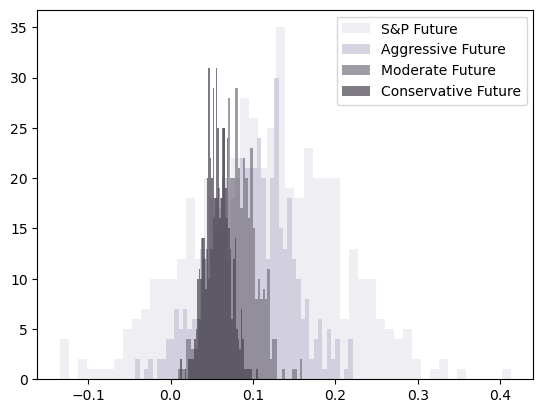

In [8]:
plt.hist(future_returns['S&P Future'], bins=50, alpha=0.7, color='#e9e9ee')
plt.hist(future_returns['Aggressive Future'], bins=50, alpha=0.7, color='#c7c2d6')
plt.hist(future_returns['Moderate Future'], bins=50, alpha=0.7, color='#787380')
plt.hist(future_returns['Conservative Future'], bins=50, alpha=0.7, color='#494351')
plt.legend(['S&P Future', 'Aggressive Future', 'Moderate Future', 'Conservative Future'])

In [9]:
statistics = {'Return Rates': ['S&P Future', 'Aggressive Future', 'Moderate Future', 'Conservative Future'],
            'Mean': [np.mean(future_returns['S&P Future']), np.mean(future_returns['Aggressive Future']), np.mean(future_returns['Moderate Future']), np.mean(future_returns['Conservative Future'])],
            'Standard Deviation': [np.std(future_returns['S&P Future']), np.std(future_returns['Aggressive Future']), np.std(future_returns['Moderate Future']), np.std(future_returns['Conservative Future'])],
             'Variance': [stat.variance(future_returns['S&P Future']), stat.variance(future_returns['Aggressive Future']), stat.variance(future_returns['Moderate Future']), stat.variance(future_returns['Conservative Future'])]}   
                                                                                                      
statistics_table = pd.DataFrame.from_dict(statistics).set_index('Return Rates')                      
display(statistics_table)

,Mean,Standard Deviation,Variance
Return Rates,,,
S&P Future,0.113100,0.086866,0.007561
Aggressive Future,0.095249,0.048263,0.002334
Moderate Future,0.075750,0.025390,0.000646
Conservative Future,0.056779,0.014736,0.000218
